In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('./cereal.csv',sep=';')
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,String,Categorical,Categorical,Int,Int,Int,Int,Float,Float,Int,Int,Int,Int,Float,Float,Float
1,100% Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,68.402973
2,100% Natural Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33.983679
3,All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,59.425505
4,All-Bran with Extra Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,93.704912


In [3]:
df = df[['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','shelf','weight','cups','rating']]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   calories  78 non-null     object
 1   protein   78 non-null     object
 2   fat       78 non-null     object
 3   sodium    78 non-null     object
 4   fiber     78 non-null     object
 5   carbo     78 non-null     object
 6   sugars    78 non-null     object
 7   potass    78 non-null     object
 8   vitamins  78 non-null     object
 9   shelf     78 non-null     object
 10  weight    78 non-null     object
 11  cups      78 non-null     object
 12  rating    78 non-null     object
dtypes: object(13)
memory usage: 8.1+ KB


In [5]:
df = df.drop(0).apply(pd.to_numeric, errors='coerce')

In [6]:
df.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
1,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
2,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
3,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
4,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
5,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [7]:
df.corr()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148,-0.101790,0.135136,0.363932,0.052055
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137,0.100438,0.450648,-0.032358,-0.759675
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699,0.360663,0.416303,-0.495195,0.380165
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.101790,0.100438,0.360663,0.299262,1.000000,0.190762,-0.335269,0.025159


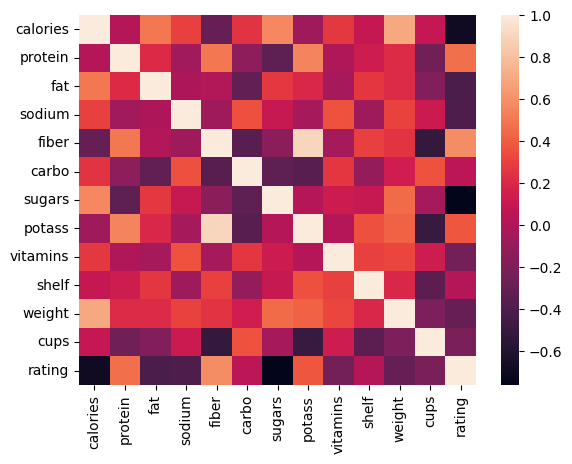

In [8]:
sns.heatmap(df.corr());

In [9]:
x = df.iloc[:,:-1].values
y = (df.loc[:,'rating']).values

In [10]:
print(x.shape)
print(y.shape)

(77, 12)
(77,)


In [11]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(61, 12)
(61,)
(16, 12)
(16,)


In [13]:
y_test

array([34.384843, 21.871292, 18.042851, 68.402973, 34.139765, 40.105965,
       31.230054, 41.50354 , 59.642837, 41.015492, 59.363993, 49.787445,
       22.396513, 19.823573, 39.259197, 53.371007])

In [32]:
ridge = Ridge(alpha=2.0).fit(x_train,y_train)

In [33]:
y_pred = ridge.predict(x_test)

In [34]:
ridge.intercept_

55.658731879191116

In [35]:
ridge.coef_

array([-0.2231887 ,  3.06751369, -1.61123249, -0.05442246,  3.29045469,
        1.07860324, -0.76017334, -0.02801206, -0.05006507, -0.07826809,
        0.09223095, -0.01310825])

In [36]:
ridge.score(x,y)

0.9997684575620296

In [37]:
y_pred 

array([34.06953838, 22.03039825, 18.26316787, 68.11404564, 34.05116523,
       40.31777503, 30.97123529, 41.28648227, 59.359953  , 40.75303863,
       59.28985955, 49.87326953, 22.67937377, 20.2751627 , 39.45109657,
       53.06723358])

In [38]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.062398680005310805
R-squared: 0.9997159245055951


In [39]:
df_y_test = pd.DataFrame(y_test,columns=['y_test'])
df_y_pred = pd.DataFrame(y_pred,columns=['y_pred'])
pd.concat([df_y_test,df_y_pred],axis=1)

,y_test,y_pred
0,34.384843,34.069538
1,21.871292,22.030398
2,18.042851,18.263168
3,68.402973,68.114046
4,34.139765,34.051165
5,40.105965,40.317775
6,31.230054,30.971235
7,41.503540,41.286482
8,59.642837,59.359953
9,41.015492,40.753039


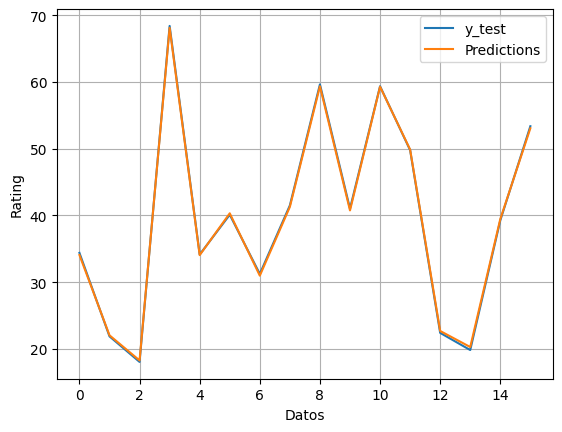

In [40]:
plt.plot(y_test)
plt.plot(y_pred)
plt.grid()
plt.xlabel('Datos')
plt.ylabel('Rating')
plt.legend(['y_test','Predictions']);
